In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(42)

In [13]:
def get_state(curr_state, drift, days):
    delta = np.random.randint(-drift, drift, dtype=int)
    next_state = curr_state + delta
    # Ensure next_state stays within bounds
    return max(0, min(next_state, 2 * days * drift))

def get_reward(curr_state, action, days, drift, start_price, strike_price):
    # Reward calculation based on action
    if action == 0:
        # No action
        return 0
    else:
        # Action taken
        return max(0, curr_state - days * drift + start_price - strike_price)

def get_action(epsilon,Q,curr_state,i,days):
    if(i>=days-1):
        return 1
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice([0, 1])
    else:
        return np.argmax(Q[curr_state, i, :])

def sarsa(start_price, strike_price, drift, days, df=0.99, num_iter=100000, lr=1):
    epsilon = 1
    epsilon_decay = 0.9999  # More gradual decay
    epsilon_min = 0.01
    trace_decay = 0.56
    Q = np.zeros((2 * drift * days + 1, days, 2))

    # Initialize Q-values with a better estimate
    for i in range(2 * drift * days + 1):
        Q[i][days - 1][1] = max(0, i - days * drift + start_price - strike_price)
    start_states=[]
    reward_arr=[]
    for ep in range(num_iter):
        E = np.zeros((2 * drift * days + 1,days,2))
        if(ep%1000==0):
            print(ep,flush=True)
        curr_state = ep % (2 * days * drift + 1)
        i = np.random.randint(0,days)
        curr_action=get_action(epsilon,Q,curr_state,i,days)
        start_action = curr_action
        reward_curr=0
        start_states.append((curr_state,i))
        while i<days:
            next_state = get_state(curr_state, drift, days)
            next_action = get_action(epsilon,Q,next_state,i+1,days)

            # Calculate reward for the taken action
            reward = get_reward(curr_state, curr_action, days, drift, start_price, strike_price)
            # Update Q-values
            E[curr_state][i][curr_action] += 1
            if curr_action == 0:
                delta = reward + df*Q[next_state,i+1,next_action] - Q[curr_state,i,curr_action]
                for day in range(days):
                    for s in range(2*days*drift+1):
                        for a in [0,1]:
                            Q[s,day,a] += lr*delta*E[s][day][a]
                            E[s][day][a]*=df*trace_decay
            else:
                delta = reward - Q[curr_state,i,curr_action]
                for day in range(days):
                    for s in range(2*days*drift+1):
                        for a in [0,1]:
                            Q[s,day,a] += lr*delta*E[s][day][a]
                            E[s][day][a]*=df*trace_decay
                reward_curr=reward*math.pow(df,i-start_states[-1][1])
                break
            i += 1
            curr_state = next_state
            curr_action=next_action
        epsilon = max(epsilon_min, epsilon * epsilon_decay)  # Gradual decay
        lr *= epsilon_decay
        reward_arr.append(reward_curr)

    return Q,start_states,reward_arr

In [14]:
days=5
drift=5
start = 500
strike=505
Q,st,rew = sarsa(start,strike,drift,days)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000


In [15]:
arr=[]
for i in range(days):
    for state in range(0,2*days*drift+1):
        if(Q[state][i][1]>Q[state][i][0]):
            arr.append(state+start-days*drift)
            print("Optimal Stopping for Day:",i+1,"is",state+start-days*drift)
            break

Optimal Stopping for Day: 1 is 507
Optimal Stopping for Day: 2 is 507
Optimal Stopping for Day: 3 is 507
Optimal Stopping for Day: 4 is 506
Optimal Stopping for Day: 5 is 506


In [16]:
policy=[]
for i in range(days):
    curr=[]
    for state in range(0,2*days*drift-1):
        if(Q[state][i][1]>Q[state][i][0]):
            curr.append(1)
        else:
            curr.append(0)
    policy.append(curr)

for e in policy:
    print(e)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
def transition_probability(drift):
    """
    Calculates the transition probability for the given drift.
    """
    return 1 / (2 * drift + 1)

def get_state(drift):
    """
    Generates a random state within the given drift range.
    """
    return np.random.randint(-drift, drift, dtype=int) 

def value_iteration(gamma=0.99):
    """
    Performs value iteration to find the optimal policy.
    """
    start_price, strike_price = 500, 505
    drift = 5  # Change in stock price on each day
    T = 5  # Number of days till expiry

    V = np.zeros((2 * T * drift + 1, T))
    policy = np.zeros((T, 2 * T * drift + 1))

    # Initialize the value function and policy
    for state in range(2 * T * drift + 1):
        V[state][T - 1] = max(0, state - (strike_price - start_price) - T * drift)
        if V[state][T - 1] > 0:
            policy[T - 1][state] = 1

    # Perform value iteration
    for t in reversed(range(T - 1)):
        Q = np.zeros((2 * T * drift + 1, 2))
        for state in range(2 * T * drift + 1):
            for action in [0, 1]:
                new_value = 0.0
                if action == 0:
                    reward = 0
                    for next_state in range(state - drift, state + drift):
                        if 0 <= next_state <= 2 * T * drift:
                            new_value += transition_probability(drift) * (reward + gamma * V[next_state][t + 1])
                else:
                    reward = max(0, state - (strike_price - start_price) - T * drift)
                    new_value = reward
                Q[state][action] = new_value
            V[state][t] = max(Q[state])
            # Update policy based on Q values
            if Q[state][0] >= Q[state][1]:
                policy[t][state] = 0
            else:
                policy[t][state] = 1
    return V

In [18]:
V = value_iteration()

In [19]:
regrets=[]
for i in range(0,len(st)):
    if len(regrets) == 0:
        regrets.append(V[st[i]] - rew[i])
    else:
        regrets.append(V[st[i]] - rew[i])

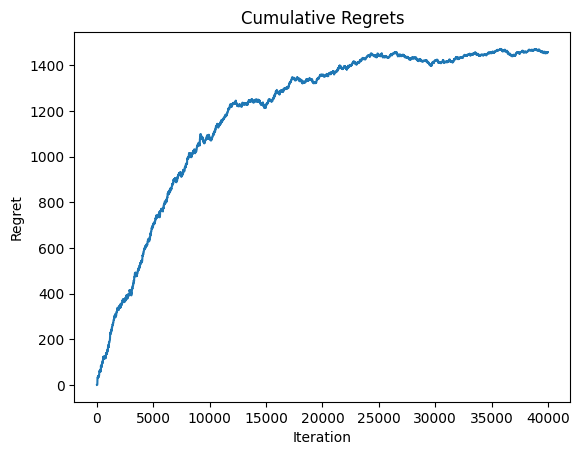

In [23]:
arr_tot = np.cumsum(regrets)
plt.plot(arr_tot[:40000])
plt.title("Cumulative Regrets")
plt.ylabel("Regret")
plt.xlabel("Iteration")
plt.show()

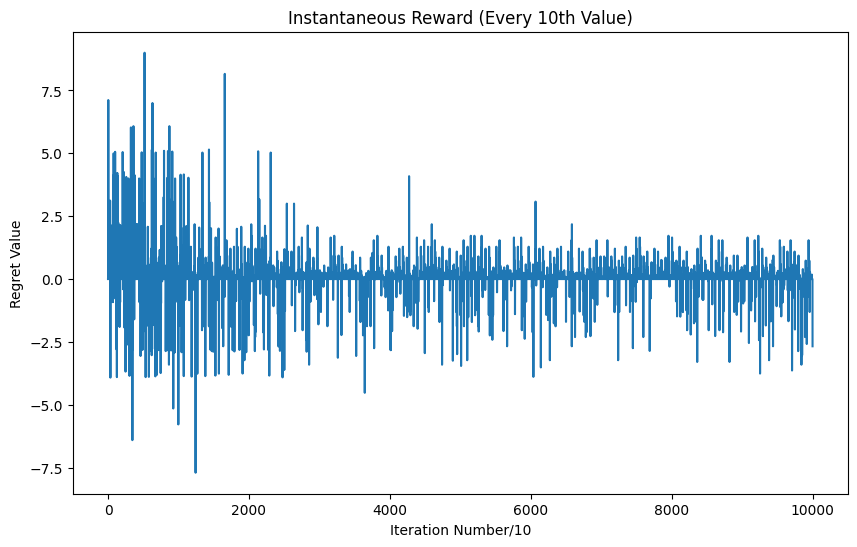

In [27]:
regrets_downsampled = regrets[::10]

plt.figure(figsize=(10, 6))
plt.plot(regrets_downsampled)
plt.title("Instantaneous Reward (Every 10th Value)")
plt.xlabel("Iteration Number/10")
plt.ylabel("Regret Value")
plt.show()

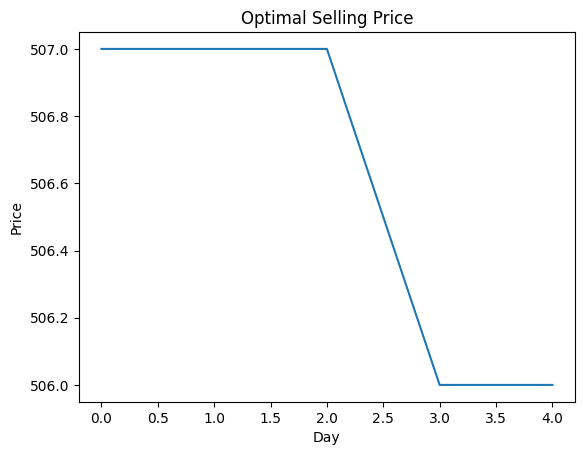

In [25]:
plt.plot(arr)
plt.title("Optimal Selling Price")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()